## Ethanol/Water Example

In [1]:
import os
import warnings

import matplotlib.pyplot as plt

from kbkit import Pipeline

warnings.filterwarnings("ignore")

### Build and Run KBPipeline

In [2]:
# extract info from prj_name
prj = "test_data/ethanol_water_26C"


# create & run pipeline
pipe = Pipeline(
    pure_path="test_data/pure_components",
    pure_systems=["ETHOL_300", "SPCEW_300"],
    base_path=prj,
    rdf_dir="kbi_rdf_files_gmx25",
    start_time=10000,
    ensemble="npt",
)

pipe.run()

#### Save Pipeline results to .npz file

In [23]:
pipe.save("./ethanol_water_26C_results")

Successfully saved results to ./ethanol_water_26C_results.npz


#### Load pipeline results

In [26]:
results = Pipeline.load("./ethanol_water_26C_results.npz")
results.keys()

Successfully loaded results from ./ethanol_water_26C_results.npz


KeysView(NpzFile './ethanol_water_26C_results.npz' with keys: A_inv_matrix, A_matrix, dlngammas_dxs, dmui_dxi, dmui_dxj...)

### Make Figures from Pipeline

In [3]:
# plot function; initialized pipe.plotter instance

pipe.plot(molecule_map={"ETHOL": "ethanol", "SPCEW": "water"}, x_mol="ETHOL")

#### Plot Individual Figures

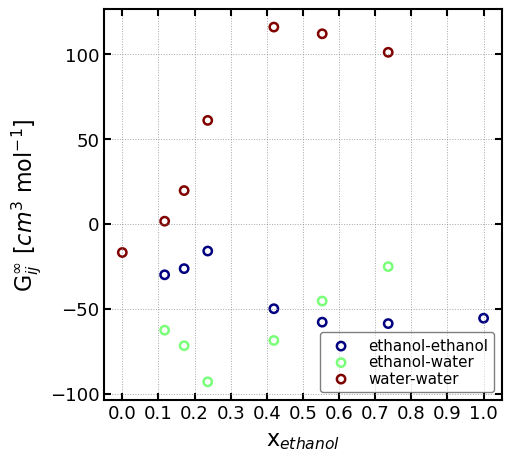

In [4]:
fig, ax = pipe.plotter.plot_kbis(units="cm^3/mol", show=True)

In [5]:
# Get list of all available properties to plot

pipe.plotter.available_properties()

['kbi',
 'lngammas',
 'dlngammas',
 'lngammas_fits',
 'dlngammas_fits',
 'excess',
 'mixing',
 'g_mix',
 'g_ex',
 'h_mix',
 's_ex',
 'i0',
 'hessian_determinant']

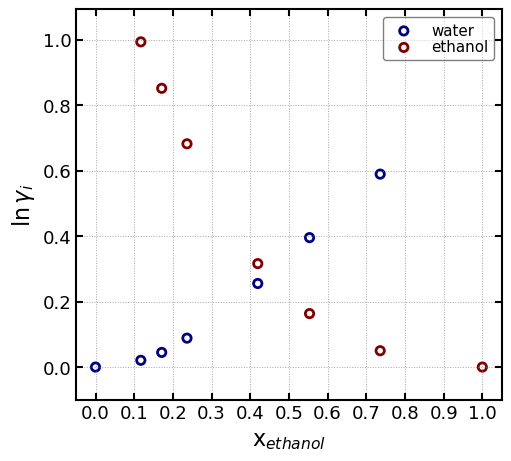

In [6]:
fig, ax = pipe.plotter.plot("lngammas", show=True)  # plot activity coefficients

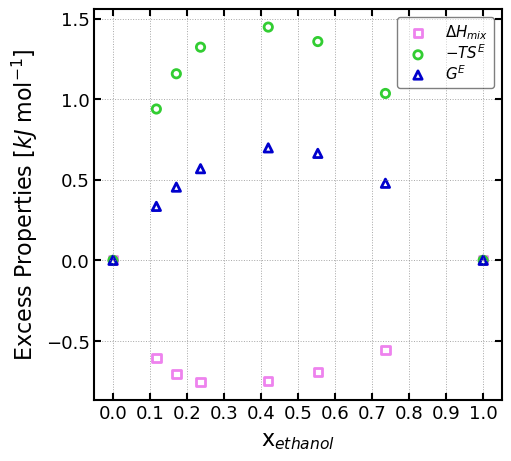

In [7]:
fig, ax = pipe.plotter.plot("excess", show=True)  # plot contributions to Gibbs excess energy

### Make an example figure showing KB Theory results

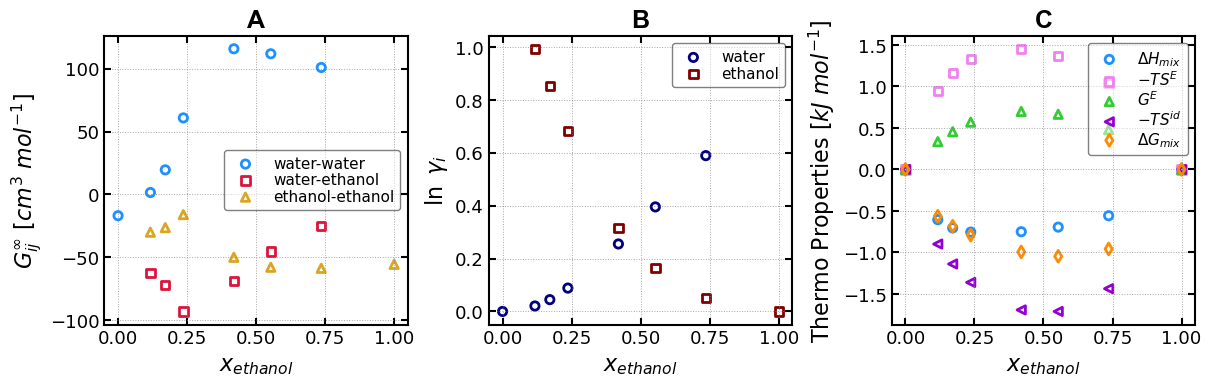

In [8]:
kbis = pipe.thermo.kbi_matrix.value
kbis_cm3_mol = pipe.convert_units("kbi_matrix", "cm^3/mol")
molmap = {"ETHOL": "ethanol", "SPCEW": "water"}
mols = pipe.state.unique_molecules
idx = mols.index("ETHOL")
x_ext = pipe.state.mol_fr[:, idx]

fig, ax = plt.subplots(1, 3, figsize=(12, 3.75), sharex=True)

ax[0].set_xlabel(r"$x_{{ethanol}}$")
ax[0].set_ylabel(r"$G_{{ij}}^\infty$ [$cm^3$ $mol^{{-1}}$]")
ax[0].scatter(x_ext, kbis_cm3_mol[:, 0, 0], c="dodgerblue", marker="o", label=f"{molmap[mols[0]]}-{molmap[mols[0]]}")
ax[0].scatter(x_ext, kbis_cm3_mol[:, 0, 1], c="crimson", marker="s", label=f"{molmap[mols[0]]}-{molmap[mols[1]]}")
ax[0].scatter(x_ext, kbis_cm3_mol[:, 1, 1], c="goldenrod", marker="^", label=f"{molmap[mols[1]]}-{molmap[mols[1]]}")
ax[0].legend(loc="center right")
ax[0].set_xlim(-0.05,1.05)

ax[1].set_xlabel(r"$x_{{ethanol}}$")
ax[1].set_ylabel(r"$\ln \ \gamma_i$")
ax[1].scatter(x_ext, pipe.results["lngammas"][:, 0], c="navy", marker="o", label=f"{molmap[mols[0]]}")
ax[1].scatter(x_ext, pipe.results["lngammas"][:, 1], c="maroon", marker="s", label=f"{molmap[mols[1]]}")
ax[1].legend(loc="upper right")

ax[2].set_xlabel(r"$x_{{ethanol}}$")
ax[2].set_ylabel(r"Thermo Properties [$kJ$ $mol^{{-1}}$]")
ax[2].scatter(x_ext, pipe.results["h_mix"], c="dodgerblue", marker="o", label=r"$\Delta H_{{mix}}$")
ax[2].scatter(x_ext, -300 * pipe.results["s_ex"], c="violet", marker="s", label=r"$-TS^E$")
ax[2].scatter(x_ext, pipe.results["g_ex"], c="limegreen", marker="^", label=r"$G^E$")
ax[2].scatter(x_ext, pipe.results["g_mix"]-pipe.results["g_ex"], c="darkviolet", marker="<", label=r"$-TS^{id}$")
ax[2].scatter(x_ext, pipe.results["g_mix"], c="darkorange", marker="d", label=r"$\Delta G_{{mix}}$")
ax[2].legend(loc="upper right", ncol=1)

ax[0].set_title("A", fontsize=18, fontweight="bold", family="Arial")
ax[1].set_title("B", fontsize=18, fontweight="bold", family="Arial")
ax[2].set_title("C", fontsize=18, fontweight="bold", family="Arial")
fig.savefig("pipeline_figs.pdf", dpi=100)

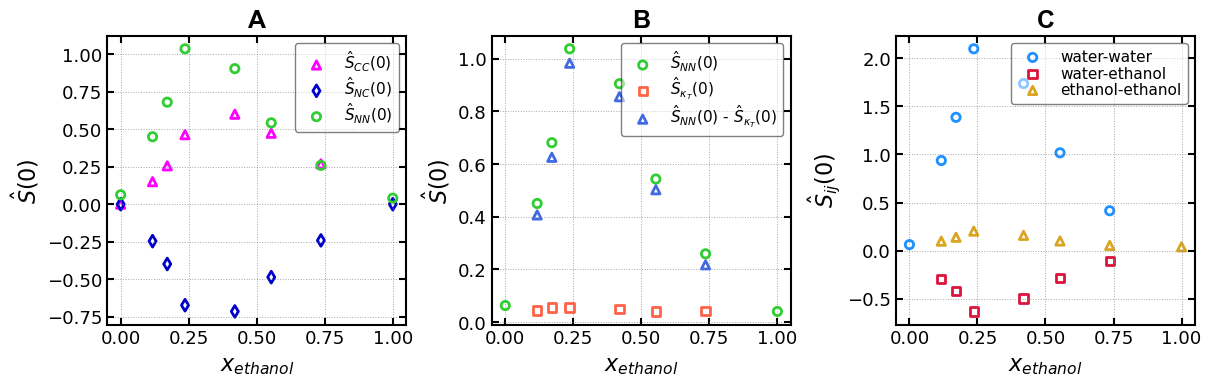

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3.75), sharex=True)
ax[0].set_xlim(-0.05,1.05)

ax[0].scatter(x_ext, pipe.thermo.s0_cc.value[:, 0, 0], marker="^", c="magenta", label=r"$\hat{S}_{CC}(0)$")
ax[0].scatter(x_ext, pipe.thermo.s0_nc.value[:, 0], marker="d", c="mediumblue", label=r"$\hat{S}_{NC}(0)$")
ax[0].scatter(x_ext, pipe.thermo.s0_nn.value, marker="o", c="limegreen", label=r"$\hat{S}_{NN}(0)$")
ax[0].legend(fontsize=11)
ax[0].set_xlabel(r"$x_{{ethanol}}$")
ax[0].set_ylabel(r"$\hat{S}(0)$")

ax[1].scatter(x_ext, pipe.thermo.s0_nn.value, marker="o", c="limegreen", label=r"$\hat{S}_{NN}(0)$")
ax[1].scatter(x_ext, pipe.thermo.s0_kappa.value, marker="s", c="tomato", label=r"$\hat{S}_{\kappa_T}(0)$")
ax[1].scatter(x_ext, pipe.thermo.s0_nn.value-pipe.thermo.s0_kappa.value, marker="^", c="royalblue", label=r"$\hat{S}_{NN}(0)$ - $\hat{S}_{\kappa_T}(0)$")

ax[1].legend(fontsize=11)
ax[1].set_xlabel(r"$x_{{ethanol}}$")
ax[1].set_ylabel(r"$\hat{S}(0)$")

molecule_map = {"SPCEW": "water", "ETHOL": "ethanol"}
mol0, mol1 = [molecule_map[mol] for mol in pipe.state.unique_molecules]

ax[2].scatter(x_ext, pipe.thermo.s0_ij.value[:, 0, 0], marker="o", c="dodgerblue", label=f"{mol0}-{mol0}")
ax[2].scatter(x_ext, pipe.thermo.s0_ij.value[:, 0, 1], marker="s", c="crimson", label=f"{mol0}-{mol1}")
ax[2].scatter(x_ext, pipe.thermo.s0_ij.value[:, 1, 1], marker="^", c="goldenrod", label=f"{mol1}-{mol1}")
ax[2].legend(fontsize=11)
ax[2].set_xlabel(r"$x_{{ethanol}}$")
ax[2].set_ylabel(r"$\hat{S}_{ij}(0)$")

ax[0].set_title("A", fontsize=18, fontweight="bold", family="Arial")
ax[1].set_title("B", fontsize=18, fontweight="bold", family="Arial")
ax[2].set_title("C", fontsize=18, fontweight="bold", family="Arial")

fig.savefig("scattering_figs_s0.pdf", dpi=100)

### Inspecting RDF Convergence & Plotting Results

In [11]:
from kbkit.analysis import KBIntegrator
from kbkit.systems import SystemProperties

prj1 = "test_data/ethanol_water_26C"
sys_path = os.path.join(prj1, "sys_405")
rdf_file = "rdf_ETHOL_SPCEW.xvg"
rdf_path = os.path.join(sys_path, "kbi_rdf_files_gmx25", rdf_file)

kbi = KBIntegrator(
    rdf_file=rdf_path,
    system_properties=SystemProperties(sys_path),
    use_fixed_rmin=False,
)

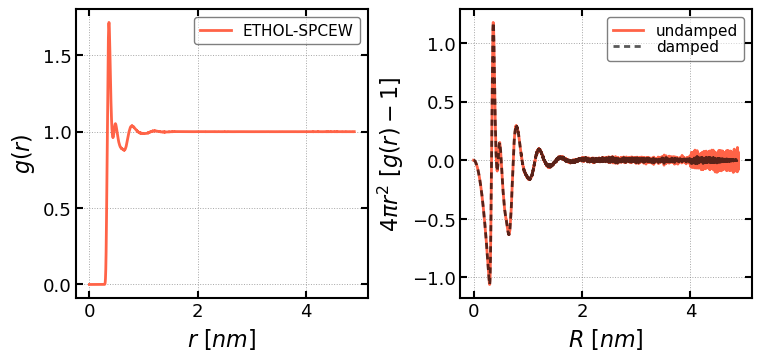

In [12]:
kbi.plot_integrand(save_dir=".")  # demonstrates impact of damp factor on integrand for running KBI

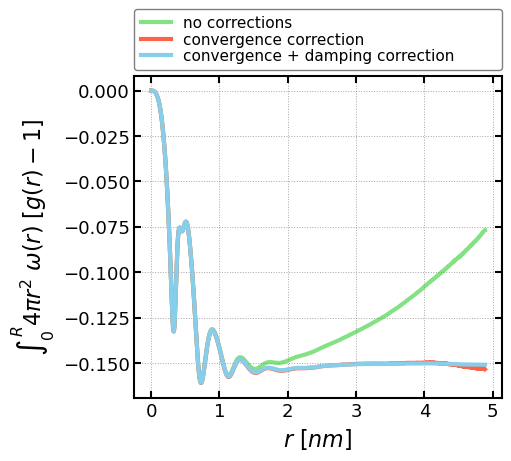

In [13]:
kbi.plot_rkbis() # demonstrates various corrections and their impact on the running kbis (rkbi)

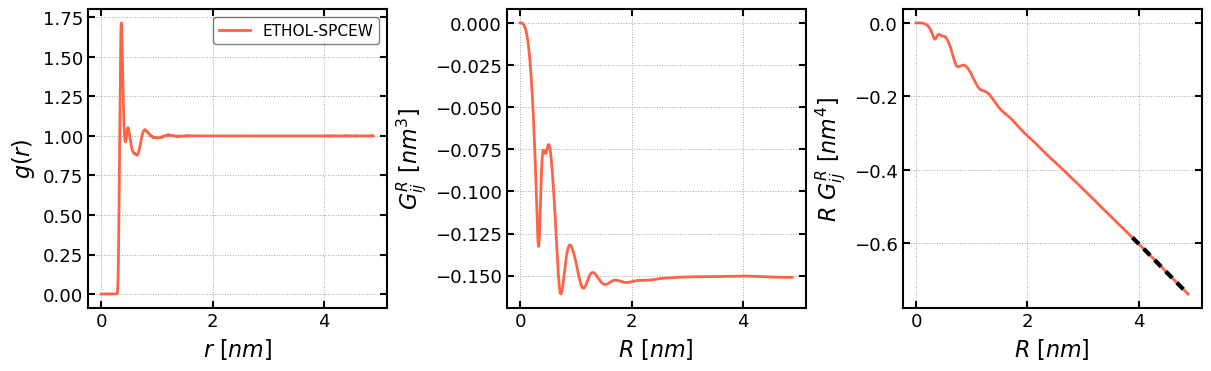

In [14]:
kbi.plot_extrapolation()  # shows linear regression to scaled running KBI for extrapolation in the thermodynamic limit

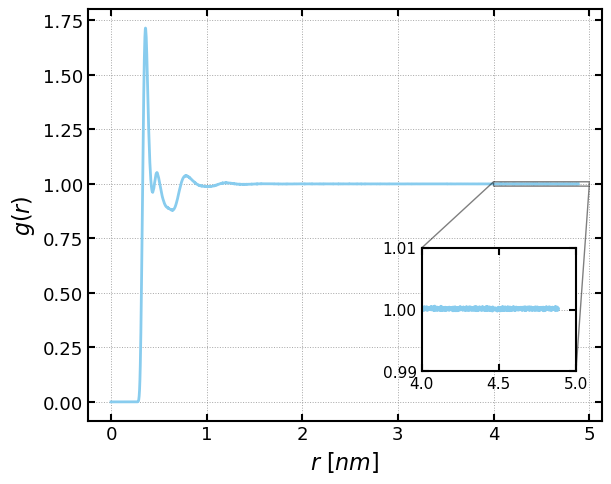

In [15]:
kbi.rdf.plot()  # shows the RDF with an inset zooming in at large r